[Reference](https://medium.com/@sarowar.saurav10/20-advanced-statistical-approaches-every-data-scientist-should-know-ccc70ae4df28)

# . Bayesian Inference

In [1]:
# !pip install pymc3  # or pymc

In [3]:
import pymc3 as pm
import numpy as np
# Suppose we observed 20 coin flips with 12 heads and 8 tails
observed_heads = 12
observed_tails = 8
with pm.Model() as model:
    # Prior for the bias of the coin (theta)
    theta = pm.Beta('theta', alpha=1, beta=1)

    # Likelihood
    y = pm.Binomial('y', n=observed_heads + observed_tails, p=theta, observed=observed_heads)

    # Posterior sampling
    trace = pm.sample(2000, tune=1000, cores=1, chains=2)
pm.summary(trace)

# 2. Maximum Likelihood Estimation (MLE)

In [4]:
import numpy as np
from scipy.stats import norm

# Generate synthetic data
data = np.random.normal(loc=5, scale=2, size=1000)
# Estimate MLE for mean and standard deviation
mu_hat, std_hat = norm.fit(data)
print(f"Estimated Mean (mu): {mu_hat:.2f}")
print(f"Estimated Std (sigma): {std_hat:.2f}")

Estimated Mean (mu): 5.10
Estimated Std (sigma): 2.03


# 3. Hypothesis Testing (t-test)

In [5]:
import numpy as np
from scipy.stats import ttest_ind

# Synthetic data
group_A = np.random.normal(5, 1, 50)
group_B = np.random.normal(5.5, 1.2, 50)
stat, pvalue = ttest_ind(group_A, group_B)
print(f"T-statistic: {stat:.2f}, p-value: {pvalue:.4f}")
if pvalue < 0.05:
    print("Reject the null hypothesis (Significant difference).")
else:
    print("Fail to reject the null hypothesis (No significant difference).")

T-statistic: -1.69, p-value: 0.0951
Fail to reject the null hypothesis (No significant difference).


# 4. Analysis of Variance (ANOVA)

In [6]:
import numpy as np
from scipy.stats import f_oneway

In [7]:
# Synthetic data
group1 = np.random.normal(10, 2, 30)
group2 = np.random.normal(12, 2, 30)
group3 = np.random.normal(14, 2, 30)
f_stat, p_val = f_oneway(group1, group2, group3)
print(f"F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}")

F-statistic: 28.73, p-value: 0.0000


# 5. Principal Component Analysis (PCA)

In [8]:
import numpy as np
from sklearn.decomposition import PCA

# Synthetic data: 100 samples with 10 features
X = np.random.rand(100, 10)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
print("Explained variance ratios:", pca.explained_variance_ratio_)
print("Reduced shape:", X_reduced.shape)

Explained variance ratios: [0.1628421  0.15190132]
Reduced shape: (100, 2)


# 6. Factor Analysis

In [9]:
!pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42622 sha256=751b76b0b7041ab34ae57a8fb2d12260c00542bbe494a527a64d2b4a63627f53
  Stored in directory: /root/.cache/pip/wheels/fa/f7/53/a55a8a56668a6fe0199e0e02b6e0ae3007ec35cdf6e4c25df7
Successfully built factor_analyzer


In [10]:
import numpy as np
from factor_analyzer import FactorAnalyzer
# Synthetic data (100 samples, 6 variables)
X = np.random.rand(100, 6)
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(X)
print("Loadings:\n", fa.loadings_)

Loadings:
 [[ 0.74531448  0.14831325]
 [ 0.25965966  0.41037383]
 [ 0.03783413  0.27689512]
 [-0.20946034  0.03037429]
 [-0.34058472  0.56439948]
 [-0.23740139 -0.03260961]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# 7. Cluster Analysis (K-means)

In [12]:
import numpy as np
from sklearn.cluster import KMeans

# Synthetic data: 200 samples, 2D
X = np.random.rand(200, 2)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
print("Cluster centers:", kmeans.cluster_centers_)
print("Cluster labels:", kmeans.labels_[:10])

Cluster centers: [[0.28086246 0.2246033 ]
 [0.37150861 0.79332293]
 [0.787493   0.44989032]]
Cluster labels: [2 2 0 1 0 2 2 0 1 2]


# 8. Bootstrapping

In [13]:
import numpy as np

np.random.seed(42)
data = np.random.normal(50, 5, size=100)  # Original sample
def bootstrap_mean_ci(data, n_bootstraps=1000, ci=95):
    means = []
    n = len(data)
    for _ in range(n_bootstraps):
        sample = np.random.choice(data, size=n, replace=True)
        means.append(np.mean(sample))
    lower = np.percentile(means, (100-ci)/2)
    upper = np.percentile(means, 100 - (100-ci)/2)
    return np.mean(means), (lower, upper)
mean_estimate, (lower_ci, upper_ci) = bootstrap_mean_ci(data)
print(f"Bootstrap Mean: {mean_estimate:.2f}")
print(f"{95}% CI: [{lower_ci:.2f}, {upper_ci:.2f}]")

Bootstrap Mean: 49.49
95% CI: [48.64, 50.31]


# 9. Time Series Analysis (ARIMA)

In [14]:
!pip install statsmodels

import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
# Synthetic time series data
np.random.seed(42)
data = np.random.normal(100, 5, 50)
time_series = pd.Series(data)
# Fit ARIMA model (p=1, d=1, q=1)
model = ARIMA(time_series, order=(1,1,1))
model_fit = model.fit()
# Forecast next 5 points
forecast = model_fit.forecast(steps=5)
print("Forecast:", forecast.values)

Forecast: [98.26367322 98.50344679 98.51156834 98.51184343 98.51185274]


# 10. Survival Analysis


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=72c4649d58237a62595f1c82c8423b8e07bfbee2595a3bd9b73a6a939152e5d8
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


<Axes: xlabel='timeline'>

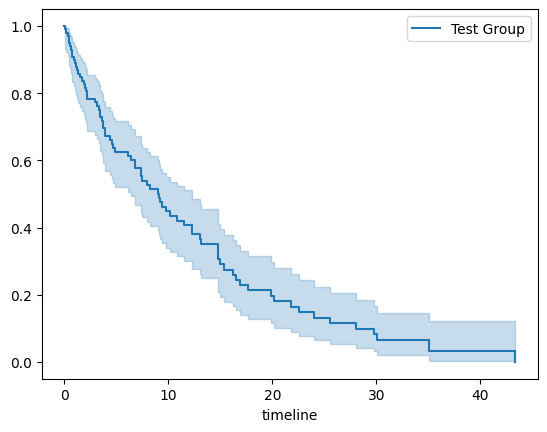

In [15]:
!pip install lifelines

import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
# Synthetic survival times and censorship
np.random.seed(42)
durations = np.random.exponential(scale=10, size=100)
event_observed = np.random.binomial(1, 0.8, size=100)
kmf = KaplanMeierFitter()
kmf.fit(durations, event_observed=event_observed, label='Test Group')
kmf.plot_survival_function()

# 11. Multivariate Regression (Multiple Linear Regression)

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Synthetic data: price = 100 + 2*rooms + 0.5*sqft + noise
np.random.seed(42)
rooms = np.random.randint(1, 5, 100)
sqft = np.random.randint(500, 2500, 100)
price = 100 + 2*rooms + 0.5*sqft + np.random.normal(0, 50, 100)
X = np.column_stack([rooms, sqft])
y = price
model = LinearRegression()
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [3.37279071 0.50877476]
Intercept: 86.44986310921195


# 12. Ridge/Lasso Regression

In [17]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

# Synthetic data
np.random.seed(42)
X = np.random.rand(100, 10)
y = X[:, 0]*5 + X[:, 1]*3 + np.random.normal(0, 0.1, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
print("Ridge coefficients:", ridge.coef_)
print("Lasso coefficients:", lasso.coef_)

Ridge coefficients: [ 4.36989979  2.56188682  0.06294406 -0.07852476  0.01579852  0.02012565
 -0.03695445 -0.06693079 -0.03260453  0.05840905]
Lasso coefficients: [ 3.79570942  1.76656425  0.         -0.          0.         -0.
 -0.         -0.         -0.          0.        ]


# 13. Logistic Regression

In [18]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = np.random.rand(100, 5)
y = np.random.randint(0, 2, 100)  # Binary labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7


# 14. Mixed Effects Models

In [19]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Synthetic data: Each student belongs to a specific school
np.random.seed(42)
school_ids = np.repeat(np.arange(10), 20)
scores = 50 + 5*np.random.rand(200) + 2*school_ids + np.random.normal(0, 5, 200)
df = pd.DataFrame({"score": scores, "school": school_ids})
model = smf.mixedlm("score ~ 1", df, groups=df["school"])
result = model.fit()
print(result.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: score    
No. Observations: 200     Method:             REML     
No. Groups:       10      Scale:              25.9801  
Min. group size:  20      Log-Likelihood:     -624.0216
Max. group size:  20      Converged:          Yes      
Mean group size:  20.0                                 
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    61.757    1.887 32.727 0.000 58.059 65.456
Group Var    34.309    3.370                           



# 15. Nonparametric Tests (Mann-Whitney U)

In [20]:
import numpy as np
from scipy.stats import mannwhitneyu

# Synthetic data
group_A = np.random.exponential(scale=1.0, size=30)
group_B = np.random.exponential(scale=1.2, size=30)
stat, pvalue = mannwhitneyu(group_A, group_B, alternative='two-sided')
print(f"Statistic: {stat:.2f}, p-value: {pvalue:.4f}")

Statistic: 358.00, p-value: 0.1761


# 16. Monte Carlo Simulation

In [21]:
import numpy as np

np.random.seed(42)
n_samples = 10_000_00
xs = np.random.rand(n_samples)
ys = np.random.rand(n_samples)
# Points within the unit circle
inside_circle = (xs**2 + ys**2) <= 1.0
pi_estimate = inside_circle.sum() * 4 / n_samples
print("Estimated π:", pi_estimate)

Estimated π: 3.141864


# 17. Markov Chain Monte Carlo (MCMC)

In [22]:
import pymc3 as pm
import numpy as np

# Synthetic data
np.random.seed(42)
data = np.random.normal(0, 1, 100)
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sd=10)
    sigma = pm.HalfNormal('sigma', sd=1)

    likelihood = pm.Normal('likelihood', mu=mu, sd=sigma, observed=data)
    trace = pm.sample(1000, tune=500, chains=2)
pm.summary(trace)

# 18. Robust Regression

In [24]:
import numpy as np
from sklearn.linear_model import RANSACRegressor, LinearRegression

np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + 2 + np.random.normal(0, 2, 100)
# Add outliers
X_outliers = np.array([[8], [9], [9.5]])
y_outliers = np.array([50, 55, 60])
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))
ransac = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
ransac.fit(X, y)
print("RANSAC Coefficients:", ransac.estimator_.coef_)
print("RANSAC Intercept:", ransac.estimator_.intercept_)

# 19. Copulas

In [26]:
!pip install copulas

import numpy as np
from copulas.multivariate import GaussianMultivariate
# Synthetic data
X = np.random.normal(0, 1, (1000, 2))
X[:,1] = 0.8 * X[:,0] + np.random.normal(0, 0.6, 1000)  # correlation
model = GaussianMultivariate()
model.fit(X)
sample = model.sample(5)
print("Original correlation:", np.corrcoef(X[:, 0], X[:, 1])[0,1])
print("Sample correlation:", np.corrcoef(sample[:, 0], sample[:, 1])[0,1])

# 20. Generalized Additive Models (GAMs)

In [27]:
!pip install pygam

import numpy as np
from pygam import LinearGAM, s
# Synthetic data
np.random.seed(42)
X = np.random.rand(200, 1) * 10
y = 2 + 3*np.sin(X).ravel() + np.random.normal(0, 0.5, 200)
gam = LinearGAM(s(0)).fit(X, y)
XX = np.linspace(0, 10, 100)
preds = gam.predict(XX)
print("Coefficients:", gam.summary())

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 18.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     11.2322
Link Function:                     IdentityLink Log Likelihood:                                  -300.7193
Number of Samples:                          200 AIC:                                              625.9029
                                                AICc:                     

<ipython-input-27-1f54354a9935>:12: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print("Coefficients:", gam.summary())
